# Useful ndreg tips

imgShow displays the images
imgRead reads a nifti file
imgWrite writes data to a nifti file

In [1]:
%matplotlib inline

In [2]:
import os
os.chdir('/Users/albert/ndreg')

Necessary packages to install are ndreg and ndio

In [3]:
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import nibabel as nb

Talia_154 = 154DLS_tail

Talia_155 = 155DLS_tail

Talia_152 = 152DLS_tail

In [4]:
inToken = "154DLS_tail"

nd = neurodata()
print(nd.get_metadata(inToken)['dataset']['voxelres'].keys())

[u'10', u'1', u'0', u'3', u'2', u'5', u'4', u'7', u'6', u'9', u'8']


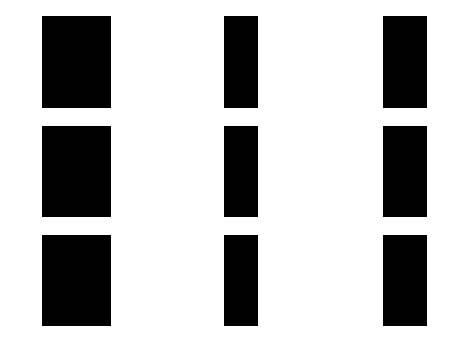

In [6]:
inImg = imgDownload(inToken, resolution=5)
imgShow(inImg, vmax=500)

Spacing used for downsampling

In [6]:
print(inImg.GetSpacing())

(3.2e-05, 3.2e-05, 9.999999999999999e-06)


In [7]:
refToken = "ara_ccf2"
refImg = imgDownload(refToken)

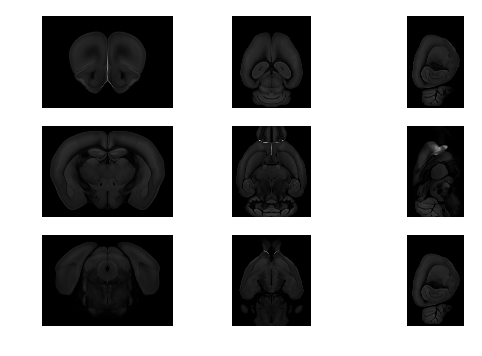

In [8]:
imgShow(refImg)

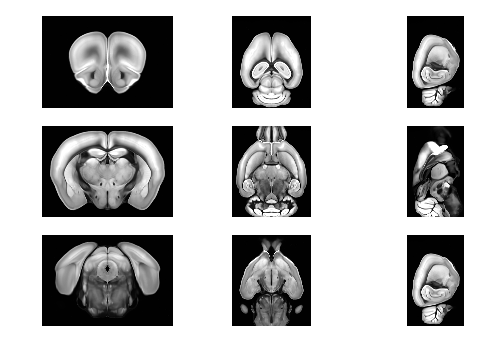

In [9]:
imgShow(refImg, vmax=500)

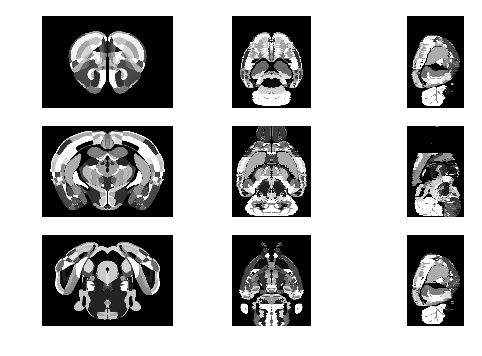

In [10]:
refAnnoImg = imgDownload(refToken, channel="annotation")
imgShow(refAnnoImg, vmax=1000)

In [11]:
randValues = np.random.rand(1000,3)

In [12]:
randValues = np.concatenate(([[0,0,0]],randValues))

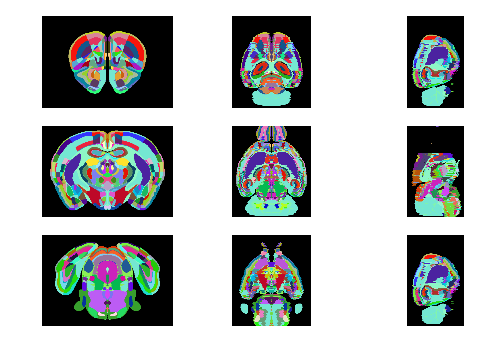

In [13]:
randCmap = matplotlib.colors.ListedColormap (randValues)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap)

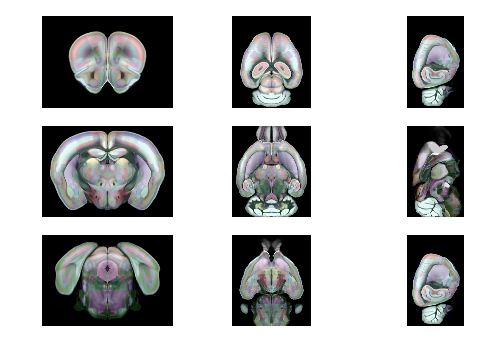

In [14]:
imgShow(refImg, vmax=500, newFig=False)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap, alpha=0.2, newFig=False)
plt.show()

In [15]:
print(inImg.GetSpacing())
print(refImg.GetSpacing())

(3.2e-05, 3.2e-05, 9.999999999999999e-06)
(0.024999999999999998, 0.024999999999999998, 0.024999999999999998)


Spacing of both the original raw data and the atlas data. inImg is the raw, refImg is the aligned.

In [16]:
inImg.SetSpacing([0.01872, 0.01872, 0.005])

In [17]:
print(inImg.GetSpacing())
print(refImg.GetSpacing())

(0.01872, 0.01872, 0.005)
(0.024999999999999998, 0.024999999999999998, 0.024999999999999998)


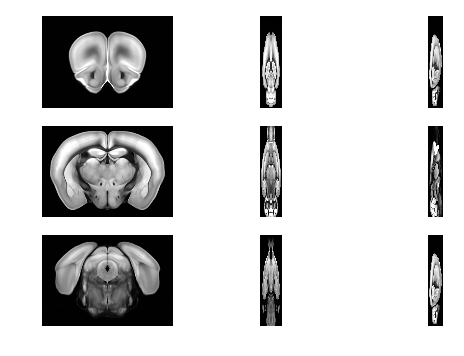

In [18]:
refImg = imgResample(refImg, spacing=inImg.GetSpacing())
imgShow(refImg, vmax=500)

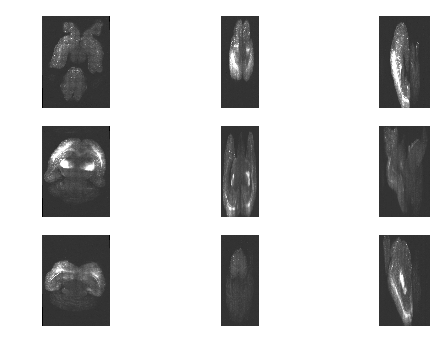

In [19]:
imgShow(inImg, vmax=500)

The reason you must download the raw data is due to the orientation.
When you import the .nii files, they are a different orientation from
downloading through ndio.

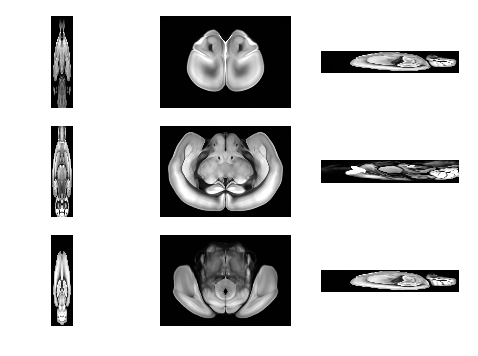

In [20]:
refImg = imgReorient(refImg, "RSA", "LAI")
imgShow(refImg, vmax=500)

This is where I do downsampling. ds stands for downsampled - for the spacing just use the original spacing of the raw data which is [0.01872, 0.01872, 0.005]. The goal is to align the spacing of the atlas to the original data. Ignore all the below until you get to the next markdown block. 
# Ignore below

[1.872, 1.872, 0.5]


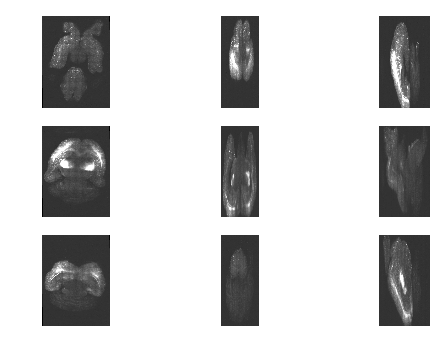

In [29]:
spacing_ds=[1.872, 1.872, 0.5]
ds_inImg = inImg
ds_inImg = imgResample(ds_inImg, spacing=spacing_ds)
print spacing_ds
imgShow(ds_inImg, vmax=500)

[9.36, 9.36, 2.5]


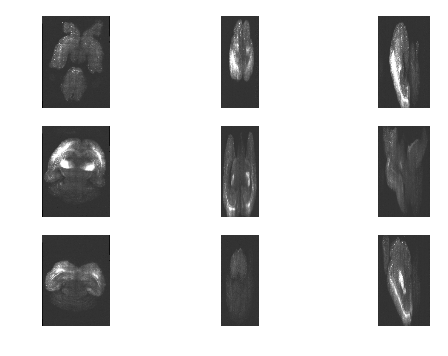

In [41]:
spacing_ds_exp=[9.36, 9.36, 2.500]
ds_inImg_exp = inImg
ds_inImg_exp = imgResample(ds_inImg_exp, spacing=spacing_ds_exp)
print spacing_ds_exp
imgShow(ds_inImg_exp, vmax=500)

In [42]:
imgWrite(ds_inImg_exp, "../downsampledexp.nii")

[3.8, 3.8, 1.015]


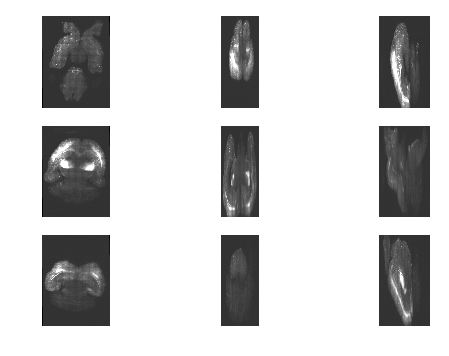

In [59]:
spacing_ds_exp=[3.8, 3.8, 1.015]
ds_inImg_exp = inImg
ds_inImg_exp = imgResample(ds_inImg_exp, spacing=spacing_ds_exp)
print spacing_ds_exp
imgShow(ds_inImg_exp, vmax=500)

In [60]:
imgWrite(ds_inImg_exp, "../superdownsampledexp.nii")

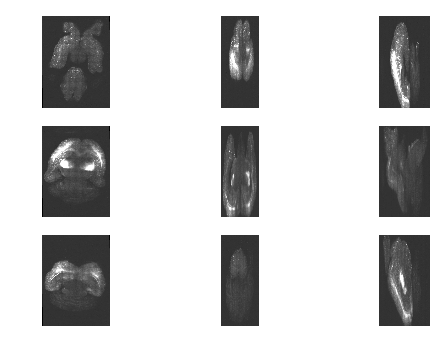

In [32]:
imgShow(ds_inImg, vmax=500)

In [30]:
imgWrite(ds_inImg, "../downsampled.nii")

# Stop Ignoring
Okay this is where you start doing the real computational heavy lifting. Make sure to set the spacing of the below
image to the origianl [0.01872, 0.01872, 0.005]. Also rename the variables since they're no longer downsampled.

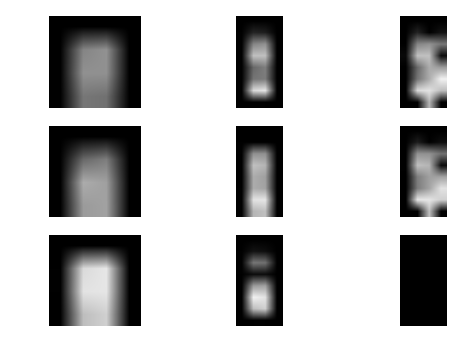

In [61]:
ds_refImg_exp = imgResample(refImg, spacing=[3.80, 3.80, 1.015])
imgShow(ds_refImg_exp, vmax=500)

In [62]:
affine = imgAffineComposite(ds_inImg_exp, ds_refImg_exp, iterations=100, useMI=True, verbose=True)

Step translation:
0.	 -0.00537090342045
1.	 -0.00528411980502
2.	 -0.00520838783698
3.	 -0.00514372943299
4.	 -0.00509016054439
5.	 -0.00504769067168
6.	 -0.00501632353115
7.	 -0.00499605690515
8.	 -0.00498688249875
9.	 -0.00498878614024
10.	 -0.00500174758852
11.	 -0.00502574079525
12.	 -0.00506073447224
13.	 -0.00510669193402
14.	 -0.00516357049777
15.	 -0.0052313235232
16.	 -0.00530989851996
17.	 -0.0053992400322
18.	 -0.00549928641137
19.	 -0.00560997327557
20.	 -0.00288595402868
21.	 -0.00317245288389
22.	 -0.00347163208503
23.	 -0.00378333829996
24.	 -0.00410741694059
25.	 -0.00444371181377
26.	 -0.00479206627896
27.	 -0.00515232414288
28.	 -0.00552432986222
29.	 -0.00590793062669
30.	 -0.00630297747675
31.	 -0.00670932540278
32.	 -0.00712683758975
33.	 -0.00755538699634
34.	 -0.00799485873035
35.	 -0.00844515787708
36.	 -0.00890621320385
37.	 -0.00937799246321
38.	 -0.00986052615427
39.	 -0.00967410411175
40.	 -0.00949775910286
41.	 -0.00933278860039
42.	 -0.00917924211175
43.	 

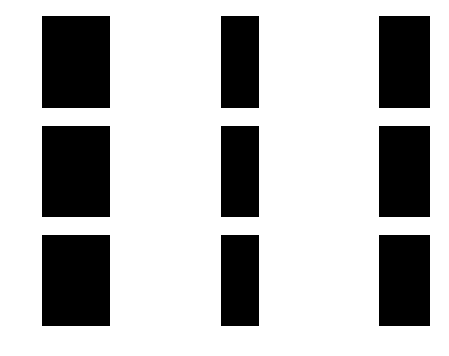

In [65]:
refImg_affine = imgApplyAffine(ds_refImg_exp, affine, size=ds_inImg_exp.GetSize())
imgShow(refImg_affine, vmax=500)

Ignore the bottom stuff it's all experimenting with different things. All you need to know is that you want the write the affine to a .nii file.

In [66]:
imgWrite(refImg_affine, "../atlasexp.nii")

In [97]:
imgWrite(refImg, "../atlasfull.nii")

In [98]:
import nibabel as nb
atlasexp = nb.load("../atlasexp.nii")
atlasfull = nb.load("../atlasfull.nii")

In [99]:
atlas_data = atlasexp.get_data()[:,:,:]
atlasfull_data = atlasfull.get_data()[:,:,:]

In [76]:
print atlas_data

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


In [132]:
def imgToPoints(self, threshold=0.1, sample=0.5, optimize=True):
        """Method to extract points data from the img file."""
        if not 0 <= threshold < 1:
            raise ValueError("Threshold should be within [0,1).")
        if not 0 < sample <= 1:
            raise ValueError("Sample rate should be within (0,1].")
        if self._img is None:
            raise ValueError("Img haven't loaded, please call loadImg() first.")

        total = self._shape[0]*self._shape[1]*self._shape[2]
        print("Coverting to points...")
        print("(This will take couple minutes)")
        # threshold
        filt = self._img > threshold * self._max
        x, y, z = np.where(filt)
        v = self._img[filt]
        v = np.int16(255*(np.float32(v)/np.float32(self._max)))
        l = v.shape
        print("Above threshold=%d"%(l))
        # sample
        if sample < 1.0:
            filt = np.random.random(size=l) < sample
            x = x[filt]
            y = y[filt]
            z = z[filt]
            v = v[filt]
        self._points = np.vstack([x,y,z,v])
        self._points = np.transpose(self._points)
        print("Samples=%d"%(self._points.shape[0]))
        print("Finished")
        return self
    
def loadEqImg(self, path = '../atlasfull.nii', info=False):
        img = nb.load(path)
        if info:
            print(img)
        self._img = img.get_data()
        self._shape = self._img.shape
        self._max = np.max(self._img)
        print("Image Loaded: %s"%(path))
        return self

In [128]:
in_data = loadEqImg(atlas_data,"/Users/albert/atlasexp.nii")
plotly_data_aligned = imgToPoints(in_data, threshold=0, sample=1)

Image Loaded: /Users/albert/atlasexp.nii
Coverting to points...
(This will take couple minutes)
Above threshold=23
Samples=23
Finished


In [138]:
in_data_full = loadEqImg(atlasfull,"/Users/albert/atlasfull.nii")
plotly_data_aligned = imgToPoints(in_data, threshold=0.9, sample=1)

Image Loaded: /Users/albert/atlasfull.nii
Coverting to points...
(This will take couple minutes)
Above threshold=1
Samples=1
Finished


In [87]:
np.savetxt('../atlas.csv', plotly_data_aligned._points, fmt='%d',delimiter=',')

####

####

In [ ]:
c258 = imgRead('../atlasfull.nii')
imgShow(c258)